In [11]:
#설치 및 기본 설정
!pip install darts[all] --quiet

import pandas as pd
from darts import TimeSeries
from darts.models import DLinearModel
from darts.metrics import mape
import matplotlib.pyplot as plt



In [3]:
#데이터 업로드 및 전처리
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('고용지표.csv')
df = df.drop(index=0).reset_index(drop=True)

df['시점'] = df['시점'].str.replace(' ', '').str.replace('.', '-') + '-01'
df['시점'] = pd.to_datetime(df['시점'], format='%Y-%m-%d')

for col in ['고용률', '실업률', '경제활동참가율']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.set_index('시점')
df = df[['고용률', '실업률', '경제활동참가율']].dropna()
df.tail()

Saving 고용지표.csv to 고용지표.csv


,고용률,실업률,경제활동참가율
시점,,,
2024-11-01,61.6,2.7,63.3
2024-12-01,61.2,3.5,63.4
2025-01-01,60.3,4.2,62.9
2025-02-01,60.5,4.7,63.5
2025-03-01,60.5,4.6,63.4


In [4]:
# TimeSeries 객체로 변환
ts_employ = TimeSeries.from_series(df['고용률'])
ts_unemp = TimeSeries.from_series(df['실업률'])
ts_partic = TimeSeries.from_series(df['경제활동참가율'])


In [5]:
# 훈련/검증 데이터 분할
train, val = ts_employ[:-3], ts_employ[-3:]


In [6]:
# DLinear 모델 학습 및 예측
model = DLinearModel(
    input_chunk_length=12,  # 과거 12개월 사용
    output_chunk_length=3,  # 미래 3개월 예측
    n_epochs=300,
    random_state=42
)

model.fit(train, verbose=True)
pred = model.predict(n=3)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 39     | train
7 | linear_trend    | Linear           | 39     | train
----------------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

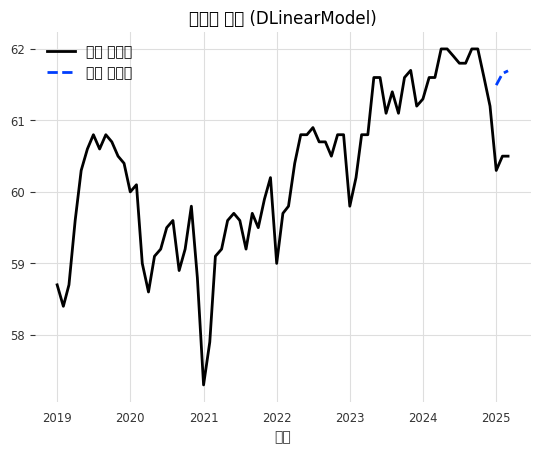

MAPE (3개월): 1.95%


In [7]:
# 결과 시각화 및 평가
ts_employ.plot(label='실제 고용률')
pred.plot(label='예측 고용률', linestyle='--')
plt.title("고용률 예측 (DLinearModel)")
plt.legend()
plt.grid(True)
plt.show()

print(f"MAPE (3개월): {mape(val, pred):.2f}%")


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 39     | train
7 | linear_trend    | Linear           | 39     | train
----------------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

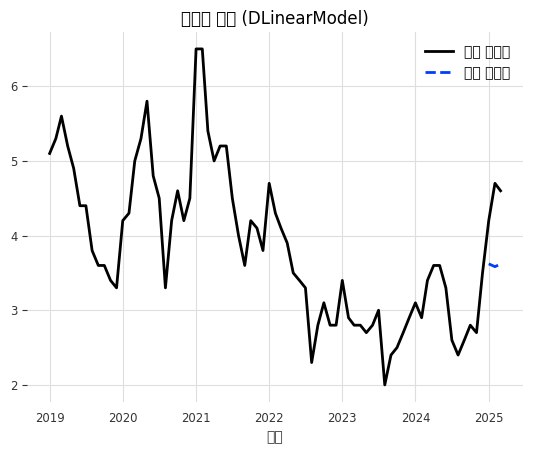

실업률 MAPE: 19.61%


In [9]:
# 실업률
train_u, val_u = ts_unemp[:-3], ts_unemp[-3:]

model.fit(train_u)
pred_u = model.predict(n=3)

ts_unemp.plot(label='실제 실업률')
pred_u.plot(label='예측 실업률', linestyle='--')
plt.title("실업률 예측 (DLinearModel)")
plt.legend()
plt.grid(True)
plt.show()

print(f"실업률 MAPE: {mape(val_u, pred_u):.2f}%")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 39     | train
7 | linear_trend    | Linear           | 39     | train
----------------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

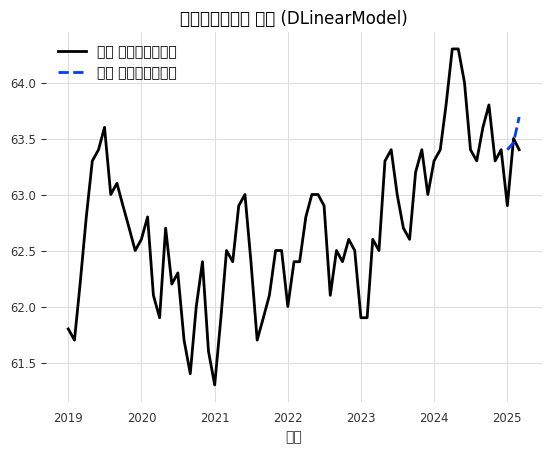

경제활동참가율 MAPE: 0.44%


In [10]:
# 경제활동참가율
train_p, val_p = ts_partic[:-3], ts_partic[-3:]

model.fit(train_p)
pred_p = model.predict(n=3)

ts_partic.plot(label='실제 경제활동참가율')
pred_p.plot(label='예측 경제활동참가율', linestyle='--')
plt.title("경제활동참가율 예측 (DLinearModel)")
plt.legend()
plt.grid(True)
plt.show()

print(f"경제활동참가율 MAPE: {mape(val_p, pred_p):.2f}%")

In [ ]:
#고용지표 예측 결과, DLinear 모델은 고용률과 경제활동참가율에서 매우 우수한 성능을 보였다.
#고용률의 MAPE는 약 1.95%로, 실제값과 거의 유사한 수준의 정확도를 보여주었다.
#경제활동참가율 또한 MAPE가 0.44%로 매우 낮아, 모델이 해당 지표의 패턴을 안정적으로 학습했음을 나타낸다.
#반면, 실업률 예측에서는 MAPE가 19.61%로 상대적으로 높게 나타났다.
#이는 실업률 데이터의 변동성이 크거나, 고용률과 달리 예측에 영향을 미치는 외부 요인이 더 많을 수 있음을 시사한다.
#또한 실업률은 상대적으로 값 자체가 작아, 소폭의 오차도 큰 백분율 오차로 환산될 가능성이 있다.
#따라서 실업률 예측 정확도를 개선하기 위해서는 더 많은 시계열 특성과 공변량이 필요할 수 있다.
#전반적으로 DLinear는 고용률과 참가율처럼 안정적인 시계열에는 강력한 예측 성능을 보여준다.